## Importanto Dataset e Imports

In [32]:
#%pip install pandas
import pandas as pd
#importa o arquivo .csv do drive
df = pd.read_csv('train.csv')

In [33]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
#%pip install scikit-learn
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## Visualização de dados

In [34]:
df.shape

(891, 12)

In [35]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.00,0,0,C.A. 34260,10.5000,F33,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.00,1,0,226875,26.0000,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.00,0,0,244358,26.0000,NaN,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.00,0,0,244310,13.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
499,500,0,3,"Svensson, Mr. Olof",male,24.00,0,0,350035,7.7958,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.00,1,0,13507,55.9000,E44,S
735,736,0,3,"Williams, Mr. Leslie",male,28.50,0,0,54636,16.1000,NaN,S


In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

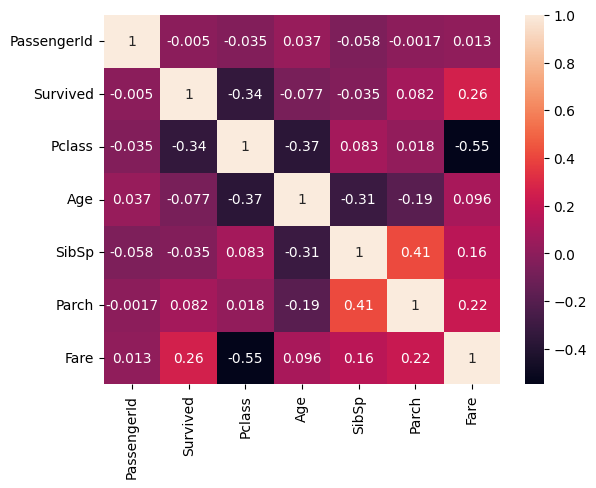

In [41]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True) #Var com maior correlação com Survived: Pclass e Fare

In [42]:
df2 = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']] #seleção de colunas mais relevantes/correlacionadas com a variável Survived

In [43]:
df2.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [44]:
#Substituindo os valores da Label 'Survived' por 'Sim' ou 'Não' para melhor visualização
df2['Survived'] = df2['Survived'].map({0:'Não', 1:'Sim'})

C:\Users\ronis\AppData\Local\Temp\ipykernel_2260\2996416573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Survived'] = df2['Survived'].map({0:'Não', 1:'Sim'})


In [45]:
#Preenchendo dados nulos para a feature idade
df2['Age'].fillna(df2['Age'].median(), inplace = True)

C:\Users\ronis\AppData\Local\Temp\ipykernel_2260\1587636029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(df2['Age'].median(), inplace = True)
C:\Users\ronis\AppData\Local\Temp\ipykernel_2260\1587636029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'].fillna(df2['Age'].median(), inplace = True)


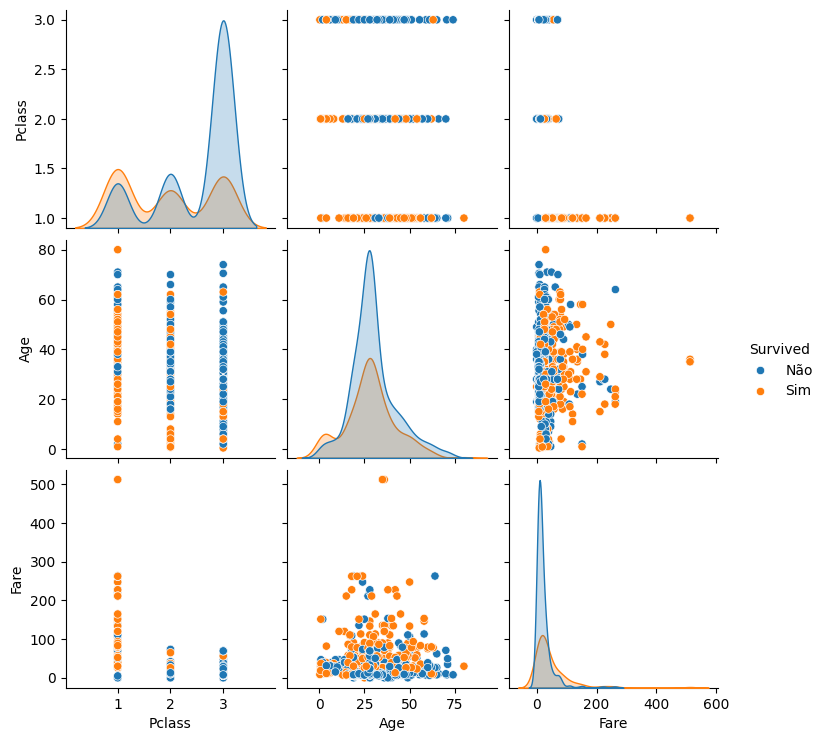

In [46]:
sns.pairplot(df2, hue = 'Survived') #Correlação entre Pclass e Survived. #Correlação entre Fare e Survived.

<Axes: xlabel='Pclass', ylabel='count'>

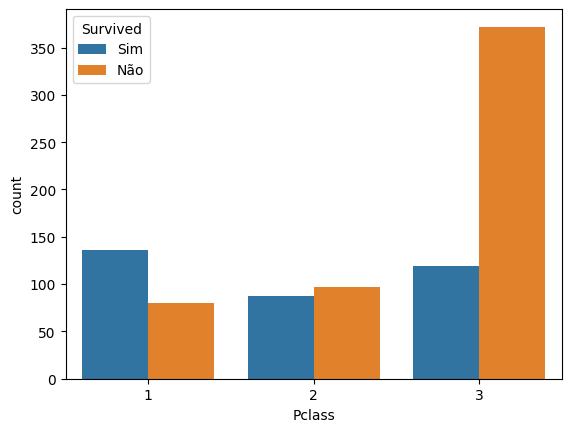

In [47]:
#número de sobreviventes por Pclass
sns.countplot(data=df2, x="Pclass", hue="Survived")

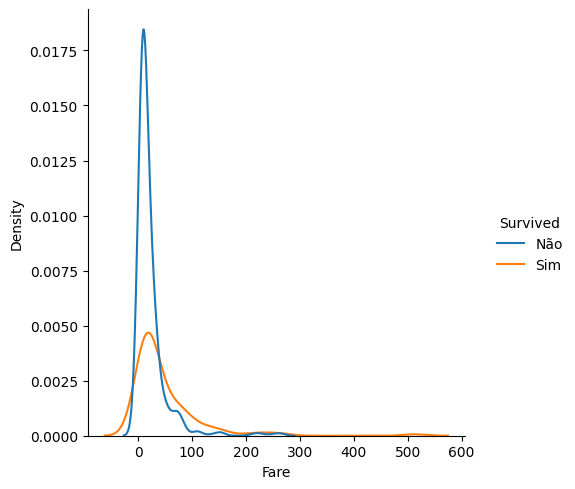

In [48]:
sns.displot(data=df2, x="Fare", hue="Survived", kind="kde")

<Axes: xlabel='Fare', ylabel='Pclass'>

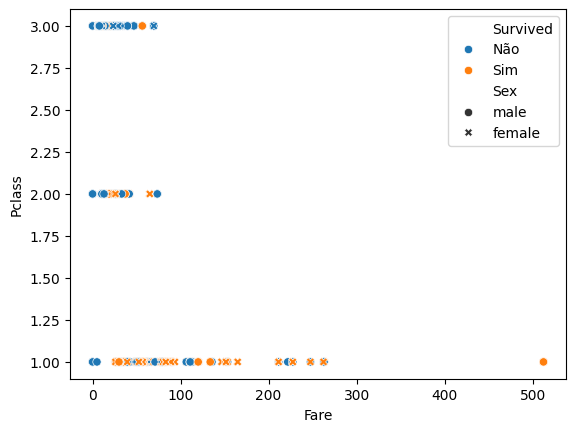

In [49]:
sns.scatterplot(data= df2, x='Fare', y='Pclass', hue='Survived', style='Sex')

<Axes: xlabel='count', ylabel='Embarked'>

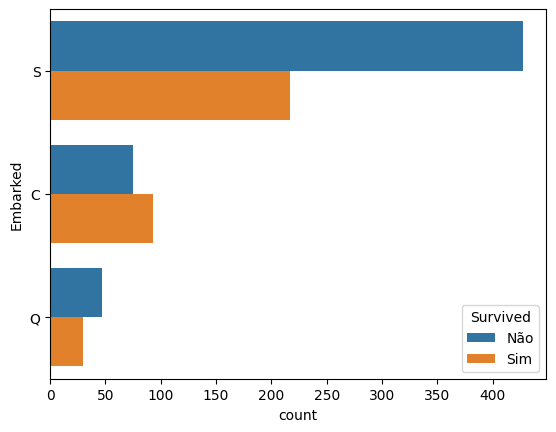

In [50]:
sns.countplot(data=df2, y="Embarked", hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

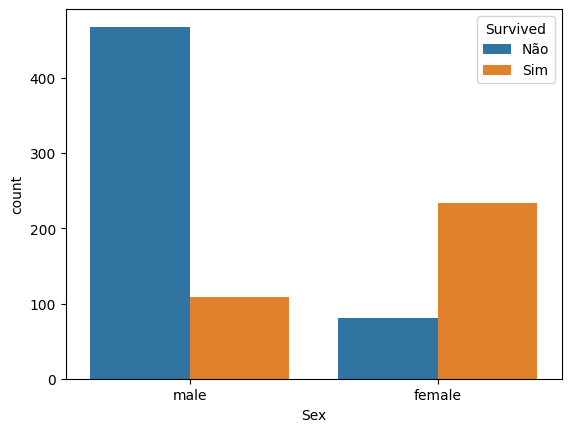

In [51]:
sns.countplot(data=df2, x="Sex", hue="Survived") #grande parte dos homens morreram. a maior parte das mulheres sobreviveram.

Text(0.5, 1.0, 'Mulher')

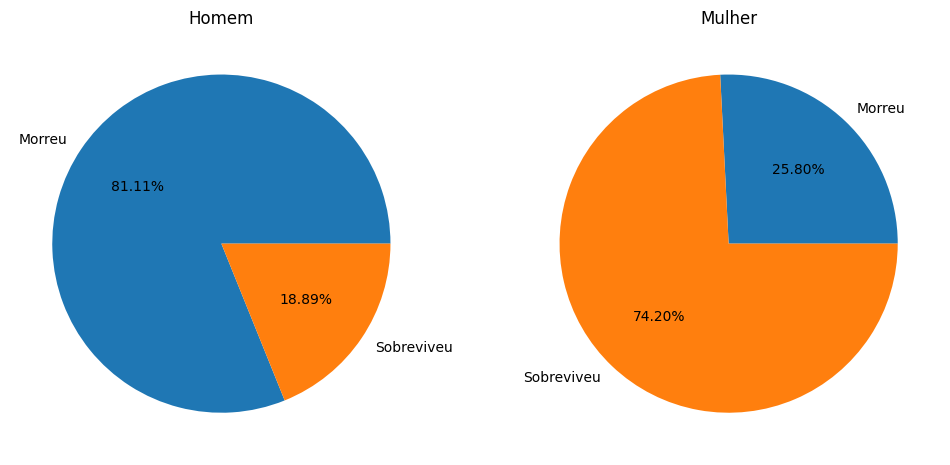

In [52]:
#1/5 dos homens sobreviveram. 3/4 das mulheres sobreviveram
#grande correlação entre a feature 'Sex' e a label 'Survived'

grouped = df.groupby(['Sex', 'Survived']).size()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(grouped['male'], labels=['Morreu', 'Sobreviveu'], autopct='%.2f%%')
ax[0].set_title('Homem')
ax[1].pie(grouped['female'], labels=['Morreu', 'Sobreviveu'], autopct='%.2f%%')
ax[1].set_title('Mulher')

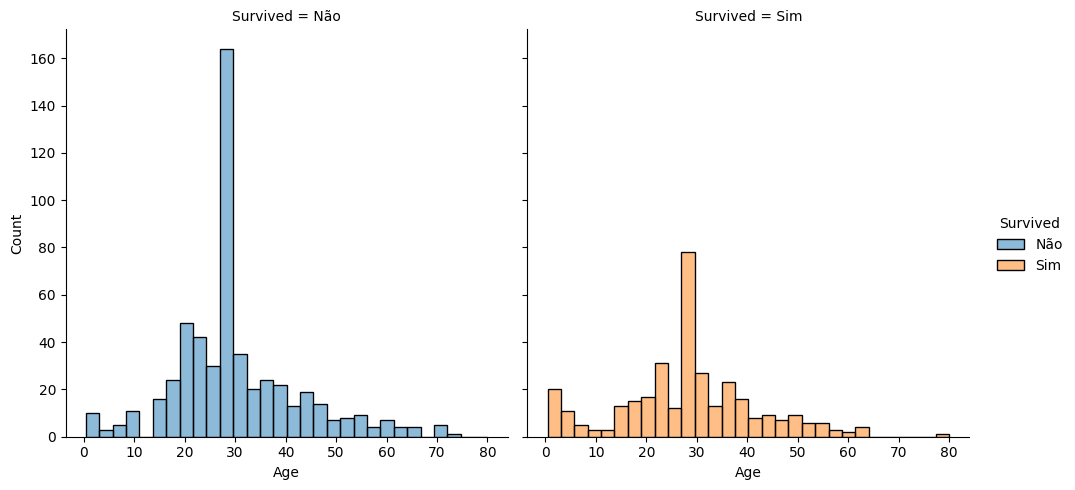

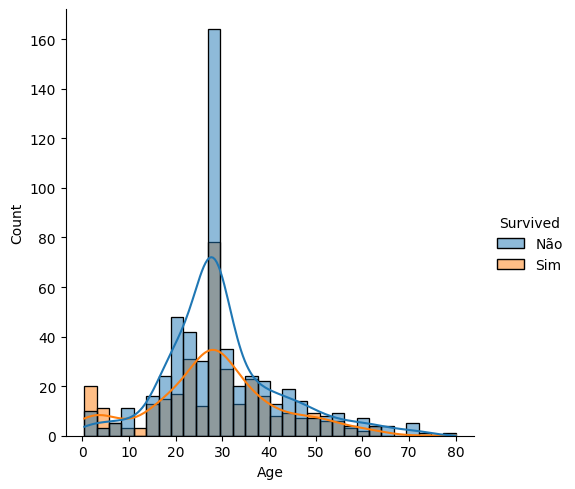

In [53]:
sns.displot(data= df2, x='Age', hue='Survived', col='Survived')
sns.displot(data= df2, x='Age', hue='Survived', kde=True)

<Axes: xlabel='Fare', ylabel='Age'>

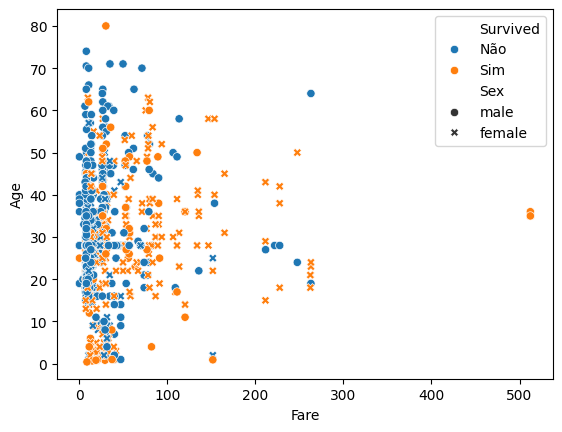

In [54]:
sns.scatterplot(data= df2, x='Fare', y='Age', hue='Survived', style='Sex')

## Preparação de dados

In [55]:
X = df.drop('Survived', axis = 1) #X: Features
Y = df['Survived'] #Y: Label

#Remoção de features irrelevantes ou com muitos dados nulos para o modelo de ML
X = X.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

#Preenchendo dados nulos para a feature idade
X['Age'].fillna(X['Age'].median(), inplace = True)

C:\Users\ronis\AppData\Local\Temp\ipykernel_2260\736064340.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace = True)


### One Hot encoding

In [56]:
#representa as features qualitativas de forma numérica criando novas colunas para cada 'qualidade' da feature
X = pd.get_dummies(X, columns = ['Pclass' ,'Embarked', 'Sex'])

### Separação treino e teste

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Normalização

In [58]:
#Separa as features numéricas
numerical_data = ['Age', 'SibSp', 'Parch', 'Fare']

#Deixa os valores das features numéricas na mesma escala
scaler = StandardScaler()
X_train[numerical_data] = scaler.fit_transform(X_train[numerical_data])

X_test[numerical_data] = scaler.fit_transform(X_test[numerical_data])

## Criação do Modelo

### Seleção de Features

In [59]:
selector = RFECV(RandomForestClassifier(), step=1, cv=10)
selector = selector.fit(X_train, Y_train)

best_features = X_train.columns[selector.support_]

# Visualize o ranking das features
print("Ranking das Features:")
print(selector.ranking_)

# Número de features selecionadas
print("Número de Features Selecionadas:", selector.n_features_)

# Visualize as melhores features
print("Melhores Features:", best_features)

Ranking das Features:
[1 1 2 1 4 6 1 5 7 3 1 1]
Número de Features Selecionadas: 6
Melhores Features: Index(['Age', 'SibSp', 'Fare', 'Pclass_3', 'Sex_female', 'Sex_male'], dtype='object')


In [60]:
#Removendo features seguindo o teste RFECV
X_train = X_train.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S' ], axis = 1)
X_test = X_test.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S' ], axis = 1)

### Hyperparameter Tuning

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
#instancia o modelo random forest
rf = RandomForestClassifier()

#faz o random search (cross validation)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose = 1, random_state = 42, n_jobs = -1)

## Treinamento

In [63]:
#treina o modelo de ML com o algoritmo de Random Forest e faz a cross validation com o random search
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\ronis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ronis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ronis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ronis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

## Teste

In [64]:
#O Modelo de ML prediz as labels para o nosso conjunto de testes
Y_pred = rf_random.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

## Avaliação do modelo de ML

In [66]:
#a medida mais importante, nesse caso (sobreviventes do Titanic), é o recall, pois o pior caso é prever que a pessoa está morta, quando na verdade ela está viva (falso negativo).
#f1-score também é uma boa medida, que é a média harmônica entre a precisão e o recall.
#como os dados não estão muito desbalanceados, é possível utilizar as outras medidas (accuracy e precision), mas elas são piores nesse caso.
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       157
           1       0.87      0.67      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

